In [1]:
import os
import yaml
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.data import Dataset
from tensorflow.python.framework.ops import disable_eager_execution 
from model import VariationalAutoEncoder
# disable_eager_execution()

if not os.path.exists("result"):
    os.mkdir("result")

config = yaml.safe_load(open('config.yaml', 'r'))
params = config['params']
encoder_params = config['encoder']
decoder_params = config['decoder']

/home/stu00608/miniconda3/envs/lofi/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.astype(np.float64) / 255.
x_train = np.expand_dims(x_train, axis=3)
x_test.astype(np.float64) / 255.
x_test = np.expand_dims(x_test, axis=3)

train_dataset = Dataset.from_tensor_slices(x_train)
train_dataset = train_dataset.shuffle(1024).batch(params["batch_size"])

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
model = VariationalAutoEncoder(
    input_shape=x_train[0].shape, 
    params=params, 
    encoder_params=encoder_params, 
    decoder_params=decoder_params)

print(model.encoder.summary())
print(model.decoder.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 14, 14, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 14, 14, 32)   128         conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 14, 14, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

wandb: Currently logged in as: stu00608 (tku-cilab). Use `wandb login --relogin` to force relogin



start epoch 0
Step 0 | r_loss : 83.67440032958984 | kl_loss : 1.1659928560256958 | loss : 84.84039306640625
Step 200 | r_loss : 82.0202865600586 | kl_loss : 0.08978042751550674 | loss : 82.11006927490234
Step 400 | r_loss : 84.84160614013672 | kl_loss : 0.04116145521402359 | loss : 84.88276672363281

Time : 12.272198677062988



start epoch 1
Step 0 | r_loss : 81.70181274414062 | kl_loss : 0.03180147707462311 | loss : 81.73361206054688
Step 200 | r_loss : 84.72127532958984 | kl_loss : 0.014492291025817394 | loss : 84.73577117919922
Step 400 | r_loss : 81.50486755371094 | kl_loss : 0.008730615489184856 | loss : 81.51359558105469


/home/stu00608/Repositories/ae-family/VAE/model.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(n, n, index+1)



Time : 10.762385129928589



start epoch 2
Step 0 | r_loss : 84.78284454345703 | kl_loss : 0.007681004237383604 | loss : 84.79052734375
Step 200 | r_loss : 84.94071960449219 | kl_loss : 0.0035591537598520517 | loss : 84.94428253173828
Step 400 | r_loss : 84.28406524658203 | kl_loss : 0.0030668913386762142 | loss : 84.2871322631836

Time : 10.688249588012695



start epoch 3
Step 0 | r_loss : 82.7378158569336 | kl_loss : 0.0023533960338681936 | loss : 82.74016571044922
Step 200 | r_loss : 82.5236587524414 | kl_loss : 0.0017798085464164615 | loss : 82.52543640136719
Step 400 | r_loss : 81.92168426513672 | kl_loss : 0.0011687554651871324 | loss : 81.9228515625

Time : 10.230247735977173



start epoch 4
Step 0 | r_loss : 85.69905853271484 | kl_loss : 0.0013552276650443673 | loss : 85.7004165649414
Step 200 | r_loss : 83.05974578857422 | kl_loss : 0.0006484502810053527 | loss : 83.06039428710938
Step 400 | r_loss : 82.95936584472656 | kl_loss : 0.0007040619966574013 | loss : 82.9600677490

KeyboardInterrupt: 

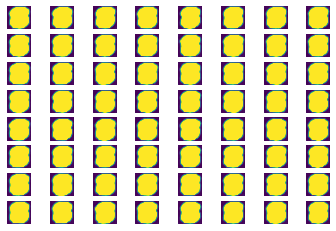

In [4]:
model.train(train_dataset)